# 1. Introduction
An exploratory data analysis will be conducted on a database containing information about 5G networks. This database includes attributes such as 'operator,' 'city_name,' 'deployment_type,' 'status,' 'latitude,' and 'longitude.'

Within this analysis, the following stages will be carried out: the importation of necessary libraries, data loading, data exploration, data cleaning, and the creation of visualizations. These phases are essential for effectively understanding, preparing, and presenting the data. As we progress, we will highlight important patterns, trends, and conclusions related to 5G networks.

# 2. Importing Libraries

In [8]:
pip install pandas numpy matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Loading

In [5]:
df = pd.read_csv('src/5g_coverage.csv')

# 4. Initial Data Exploration
We will examine the DataFrame to gain a better understanding.

In [6]:
df.head(10)

,operator,city_name,deployment_type,status,latitude,longitude
0,Ooredoo,Abdullah al-Salem,5G NR,Commercial Availability,29.35186,47.98369
1,Optus,Canberra,5G NR,Commercial Availability,-35.28200,149.12868
2,Optus,Sydney,5G NR,Commercial Availability,-33.86748,151.20698
3,AT&T Mobility,"Jacksonville, FL",5G NR,Commercial Availability,30.33218,-81.65565
4,AT&T Mobility,"Atlanta, GA",5G NR,Commercial Availability,33.74900,-84.38798
5,AT&T Mobility,"Indianapolis, IN",5G NR,Commercial Availability,39.76840,-86.15807
6,AT&T Mobility,"Louisville, KY",5G NR,Commercial Availability,38.25266,-85.75846
7,AT&T Mobility,"Charlotte, NC",5G NR,Commercial Availability,35.22709,-80.84313
8,AT&T Mobility,"Raleigh, NC",5G NR,Commercial Availability,35.77959,-78.63818
9,AT&T Mobility,"Oklahoma City, OK",5G NR,Commercial Availability,35.46756,-97.51643


In [7]:
df.shape

(145629, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145629 entries, 0 to 145628
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   operator         145629 non-null  object 
 1   city_name        145629 non-null  object 
 2   deployment_type  145629 non-null  object 
 3   status           145629 non-null  object 
 4   latitude         145629 non-null  float64
 5   longitude        145629 non-null  float64
dtypes: float64(2), object(4)
memory usage: 6.7+ MB


In [9]:
df.isna().sum()

operator           0
city_name          0
deployment_type    0
status             0
latitude           0
longitude          0
dtype: int64

In [10]:
for f in df.columns:
    print(f, df[f].nunique())

operator 236
city_name 104033
deployment_type 5
status 3
latitude 103427
longitude 103843


In [11]:
duplicated = df.duplicated().sum()
print('Total duplicates:', duplicated)

Total duplicates: 675


# 5. Data Cleaning
We have previously confirmed that there are no null values within the DataFrame, therefore, we will analyze what to do with the duplicates.

In [12]:
duplicates = df[df.duplicated(keep=False)]
duplicates.head(10)

,operator,city_name,deployment_type,status,latitude,longitude
74,Swisscom,Lucerne,5G NR,Commercial Availability,47.05017,8.30931
276,China Unicom,Shanghai,5G NR,Commercial Availability,31.23042,121.47370
277,China Unicom,Beijing,5G NR,Commercial Availability,39.90421,116.40740
278,China Unicom,Hangzhou,5G NR,Commercial Availability,30.27409,120.15507
280,China Unicom,Shenzhen,5G NR,Commercial Availability,22.54310,114.05787
281,China Unicom,Guangzhou,5G NR,Commercial Availability,23.12911,113.26439
282,China Unicom,Nanjing,5G NR,Commercial Availability,32.06026,118.79688
352,China Unicom,Tianjin,5G NR,Commercial Availability,39.08416,117.20098
353,China Unicom,Qingdao,5G NR,Commercial Availability,36.06711,120.38261
354,China Unicom,Wuhan,5G NR,Commercial Availability,30.59310,114.30539


In this particular case, research has been conducted, and the conclusion has been reached that the duplicates may be due to the deployment of multiple 5G base stations and networks to meet the demand in some larger and densely populated cities. That is why the duplicates will be retained in the database.

In [14]:
df['deployment_type'].value_counts()

deployment_type
5G NR    145608
5GNR         18
5g NR         1
5G            1
5N NR         1
Name: count, dtype: int64

After conducting research, it has been concluded that all these attributes mean the same.

In [15]:
df['deployment_type'] = df['deployment_type'].replace({'5GNR': '5G NR', '5g NR': '5G NR', '5G': '5G NR', '5N NR': '5G NR'})

In [16]:
status_counts = df['status'].value_counts()
status_counts

status
Commercial Availability    145380
Pre-Release                   222
Limited Availability           27
Name: count, dtype: int64

There doesn't seem to be anything out of the ordinary in 'status'.

# 6. Visualizations
We are going to review the top 10 operators with the most active 5G networks.

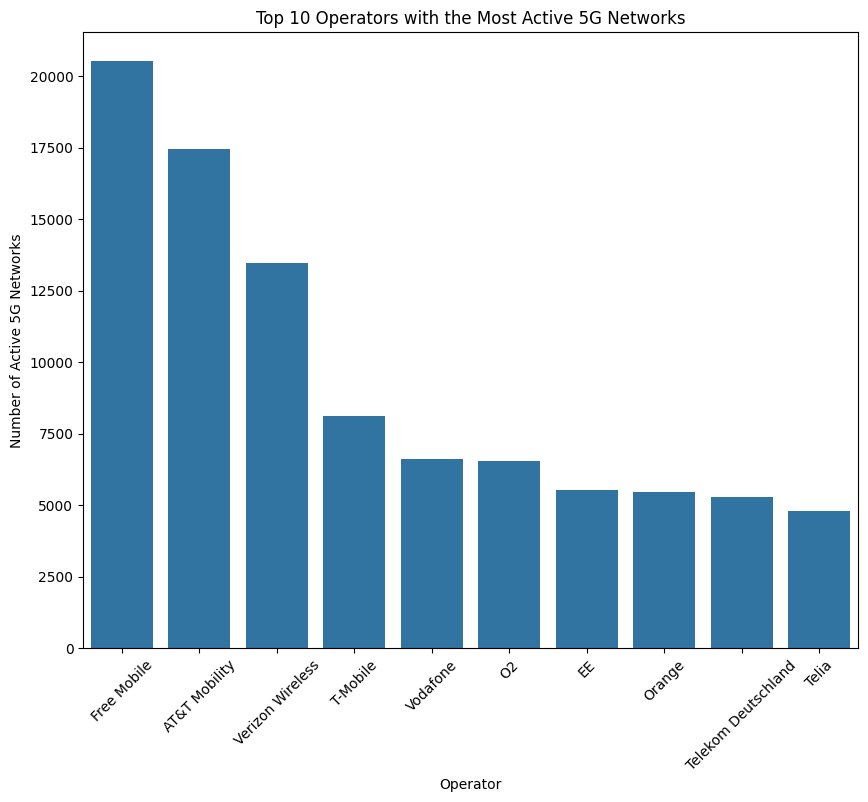

In [17]:
top_10_operators = df['operator'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_operators.index, y=top_10_operators.values)
plt.xticks(rotation=45)  

plt.title('Top 10 Operators with the Most Active 5G Networks')
plt.xlabel('Operator')
plt.ylabel('Number of Active 5G Networks')
plt.show()

As we can see, the company with the most active 5G network corresponds to Free Mobile. Free mobile is a telecommunications company based in France.

We are going to review the top 10 cities with the most active 5G networks.

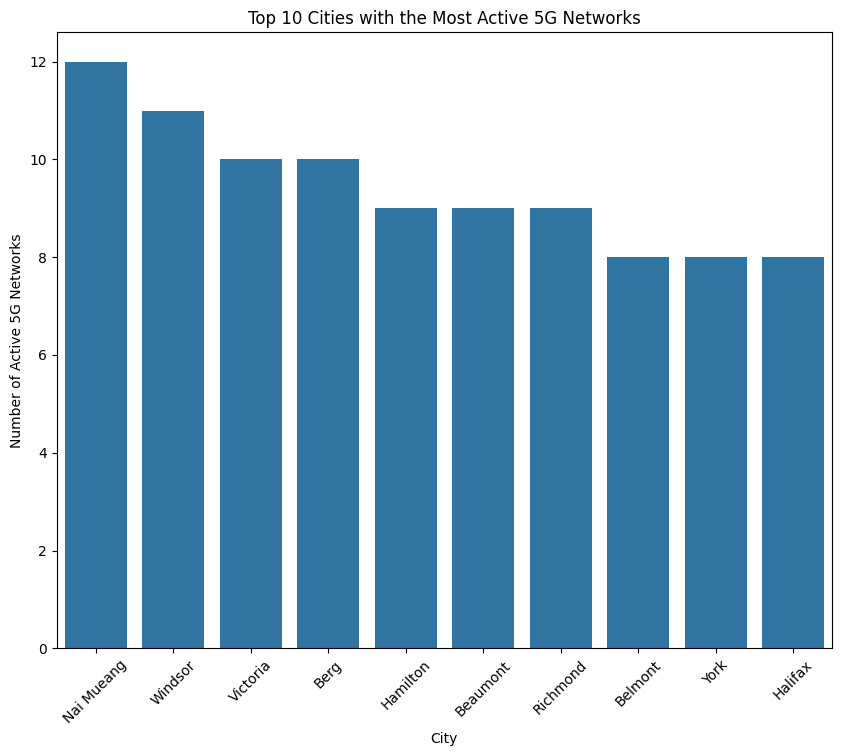

In [18]:
top_10_city = df['city_name'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_city.index, y=top_10_city.values)
plt.xticks(rotation=45)  

plt.title('Top 10 Cities with the Most Active 5G Networks')
plt.xlabel('City')
plt.ylabel('Number of Active 5G Networks')
plt.show()

Within the top, we can see that there are some cities from the United States, France, Canada, India, among others. The only anomaly could be considered the number of networks in the city of Nai Meuang, but I couldn't gather more information.

The next visualization will represent the 5G networks on the map.

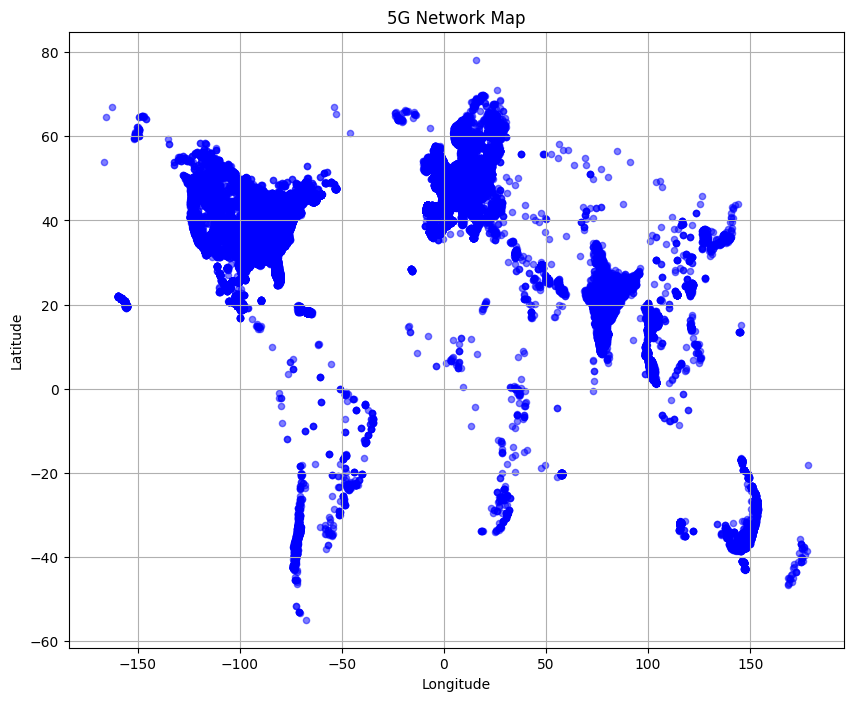

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], s=20, c='blue', marker='o', alpha=0.5)

plt.title('5G Network Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

We will Visualize the distribution of the 'status' parameter in the data frame.

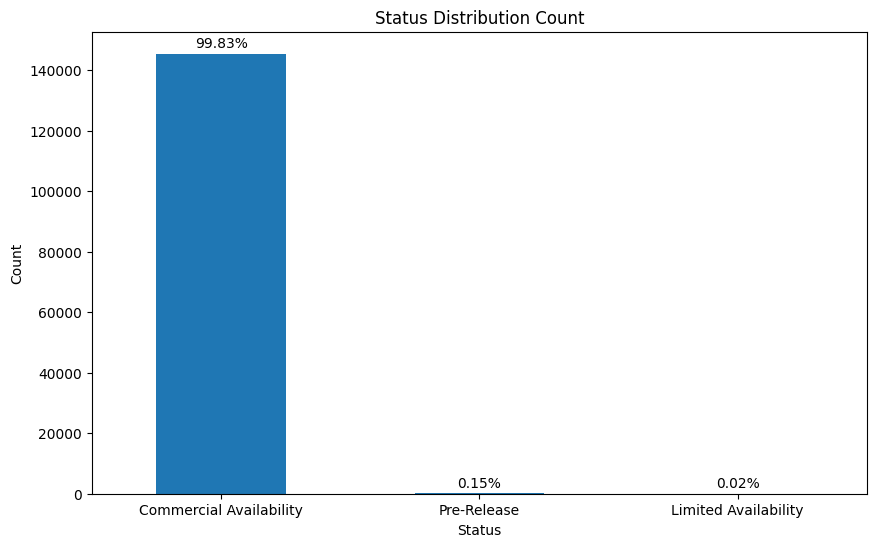

In [20]:
status_value = df['status'].value_counts()

plt.figure(figsize=(10, 6))
ax = status_value.plot(kind='bar')

total = status_value.sum()
for i, v in enumerate(status_value):
    percentage = (v / total) * 100
    ax.text(i, v + 2000, f'{percentage:.2f}%', ha='center')

plt.title('Status Distribution Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

Now, we will see in which parts of the map the largest operators are concentrated.

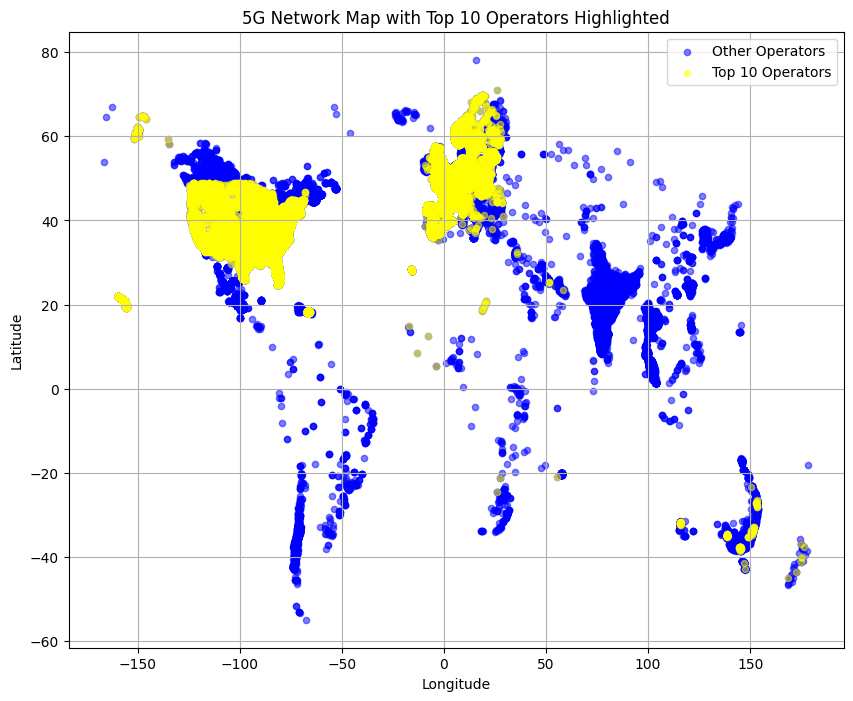

In [21]:
df_top_10 = df[df['operator'].isin(top_10_operators.index)]

plt.figure(figsize=(10, 8))

plt.scatter(df['longitude'], df['latitude'], s=20, c='blue', marker='o', alpha=0.5, label='Other Operators')

plt.scatter(df_top_10['longitude'], df_top_10['latitude'], s=20, c='yellow', marker='o', alpha=0.5, label='Top 10 Operators')

plt.title('5G Network Map with Top 10 Operators Highlighted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

# 7. Conclusion
From the analyzed data, it was observed that the database contained no null values, and no modifications to the data types of any attribute were necessary. Duplicates were observed, accounting for approximately 0.46% of the data. These values were retained with the assumption that in certain densely populated cities, multiple 5G networks are necessary.

In the 'deployment type' column, various attributes with the same meaning but different spellings or formats were found, and they were replaced. From the obtained information, it was found that the largest number of networks is held by the French company Free Mobile. It was also found that the majority of networks are located in North America and Europe. Additionally, it was found that the city with the most 5G networks is Nai Mueang, a city in India, information that couldn't be fully verified.

Also, the implementation and availability status of 5G networks was also observed.

On the other hand, we managed to highlight that 5G networks are now available worldwide.